In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

## Load Task Image

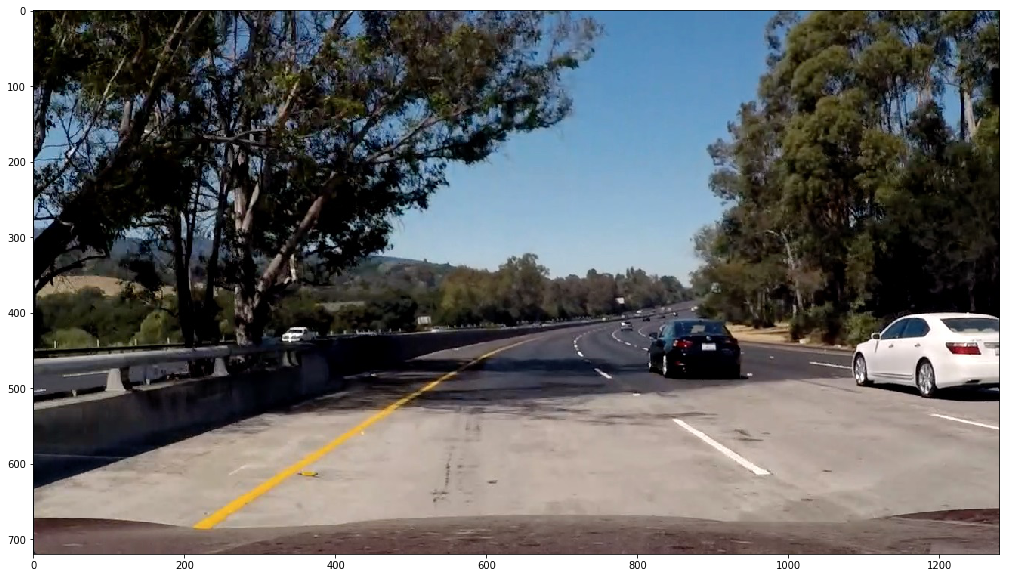

In [2]:
task_image = mpimg.imread('./test5.jpg')
f, (ax1) = plt.subplots(1, 1, figsize=(20,10))
ax1.imshow(task_image)

## Sobel X / Y Threshold

In [84]:
# X or Y sobel gradient
def abs_sobel_thresh(image, orient='x', sobel_kernel=3, thresh=(0, 255)):
    # Convert to grayscale using cv2.COLOR_RGB2GRAY as the conversion
    gray = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)
    # Apply x or y gradient with the OpenCV Sobel() function
    # and take the absolute value
    if(orient=='x'):
        sobel = cv2.Sobel(gray,cv2.CV_64F,1,0,ksize=sobel_kernel)
    else:
        sobel = cv2.Sobel(gray,cv2.CV_64F,0,1,ksize=sobel_kernel)
    
    abs_sobel = np.absolute(sobel)
    
    # Rescale back to 8 bit integer
    abs_sobel = np.uint8(255*abs_sobel/np.max(abs_sobel))
    
    # Create a binary image of ones where threshold is met, zeros otherwise
    abs_sobel_output = np.zeros_like(abs_sobel)

    abs_sobel_output [(abs_sobel >= thresh[0]) & (abs_sobel <= thresh[1])] = 1
    
    

    # Return the binary image
    return abs_sobel_output

## Sobel Magnitude Threshold

In [93]:
# Magnitude using X and Y sobel gradient
def mag_thresh(image, sobel_kernel=3, mag_thresh=(0, 255)):
    # Convert to grayscale using cv2.COLOR_RGB2GRAY as the conversion
    gray = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)

    # Calculate the gradient magnitude
    sobel_x = cv2.Sobel(gray,cv2.CV_64F,1,0,ksize=sobel_kernel)
    abs_sobel_x = np.absolute(sobel_x)

    sobel_y = cv2.Sobel(gray,cv2.CV_64F,0,1,ksize=sobel_kernel)
    abs_sobel_y = np.absolute(sobel_y)

    gradmag =  np.sqrt(np.square(sobel_x)+np.square(sobel_y))

    # Rescale to 8 bit
    gradmag = np.uint8(255*gradmag/np.max(gradmag))
   
    # Create a binary image of ones where threshold is met, zeros otherwise
    mag_binary = np.zeros_like(gradmag)
   

    mag_binary [(gradmag >= mag_thresh[0]) & (gradmag <= mag_thresh[1])] = 1

    # Return the binary image
    return mag_binary

## Sobel Direction Threshold

In [96]:
# Direction using X and Y sobel gradient
def dir_threshold(image, sobel_kernel=3, thresh=(0, np.pi/2)):
    # Convert to grayscale using cv2.COLOR_RGB2GRAY as the conversion
    gray = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)
    
    # Calculate the gradient direction using np.arctan2 function
    sobel_x = cv2.Sobel(gray,cv2.CV_64F,1,0,ksize=sobel_kernel)
    abs_sobel_x = np.absolute(sobel_x)

    sobel_y = cv2.Sobel(gray,cv2.CV_64F,0,1,ksize=sobel_kernel)
    abs_sobel_y = np.absolute(sobel_y)
    
    absgraddir = np.arctan2(abs_sobel_y,abs_sobel_x)
    
    # Rescale to 8 bit
    absgraddir = np.uint8(255*absgraddir/np.max(absgraddir))
   
    # Create a binary image of ones where threshold is met, zeros otherwise    
    dir_binary =  np.zeros_like(absgraddir)
    
    dir_binary [(absgraddir >= thresh[0]) & (absgraddir <= thresh[1])] = 1


    # Return the binary image
    return dir_binary

## Visualize Sobel Thresholds Results

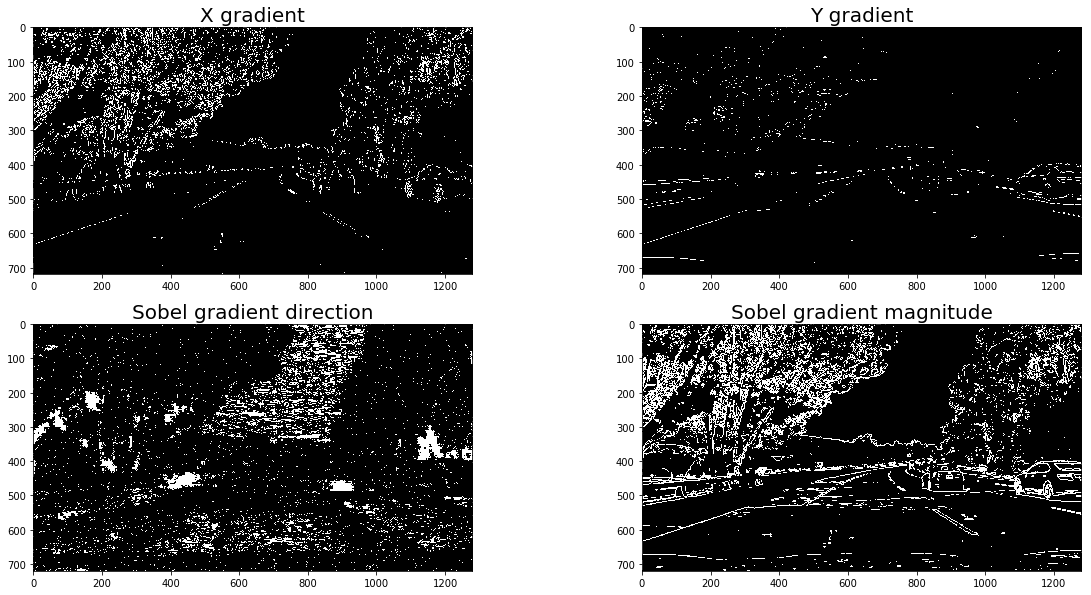

In [105]:
# X gradient
x_sobel = abs_sobel_thresh(task_image, orient='x', sobel_kernel=3, thresh=(30, 100))
# Y gradient
y_sobel = abs_sobel_thresh(task_image, orient='y', sobel_kernel=3, thresh=(70, 150))

# Sobel gradient direction
dir_sobel= dir_threshold(task_image, sobel_kernel=3, thresh=(0, np.pi/2))

# Sobel gradient magnitude
mag_sobel = mag_thresh(task_image, sobel_kernel=3, mag_thresh=(30, 255))

# visualize results
f, ([ax1,ax2],[ax3,ax4]) = plt.subplots(2, 2, figsize=(20,10))
# X gradient
ax1.set_title('X gradient', fontsize=20)
ax1.imshow(x_sobel,cmap='gray')
# Y gradient
ax2.set_title('Y gradient', fontsize=20)
ax2.imshow(y_sobel,cmap='gray')
# Sobel gradient direction
ax3.set_title('Sobel gradient direction', fontsize=20)
ax3.imshow(dir_sobel,cmap='gray')
# Sobel gradient magnitude
ax4.set_title('Sobel gradient magnitude', fontsize=20)
ax4.imshow(mag_sobel,cmap='gray')